In [1]:
from math import sqrt, exp
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
def distancia(ponto1, ponto2):
    return sqrt((ponto1[0]-ponto2[0])**2 + (ponto1[1]-ponto2[1])**2)

def filtroPassaBaixa(D0, formatoImagem):
    base = np.zeros(formatoImagem[:2])
    linhas, colunas = formatoImagem[:2]
    centro = (linhas/2, colunas/2)
    for x in range(colunas):
        for y in range(linhas):
            if distancia((y,x), centro) < D0:
                base[y,x] = 1
    return base

def filtroPassaAlta(D0, formatoImagem):
    base = np.ones(formatoImagem[:2])
    linhas, colunas = formatoImagem[:2]
    centro = (linhas/2, colunas/2)
    for x in range(colunas):
        for y in range(linhas):
            if distancia((y,x), centro) < D0:
                base[y,x] = 0
    return base

def filtroPassaFaixa(D0, D1, formatoImagem):
    base = np.zeros(formatoImagem[:2])
    linhas, colunas = formatoImagem[:2]
    centro = (linhas/2, colunas/2)
    for x in range(colunas):
        for y in range(linhas):
            if D0 < distancia((y, x), centro) < D1:
                base[y, x] = 1
    return base


def comprimirLimite(imagem, limite):
    matrizComMascara = np.abs(imagem) > limite
    # percentage calculation
    contadorPixel =  imagem.shape[0] * imagem.shape[1]
    pixelsMantidos = np.sum(matrizComMascara)
    porcentagem = (pixelsMantidos/contadorPixel)*100
    return imagem * matrizComMascara, porcentagem

# Passa-Baixa

### Passa-Baixa com corte em 20

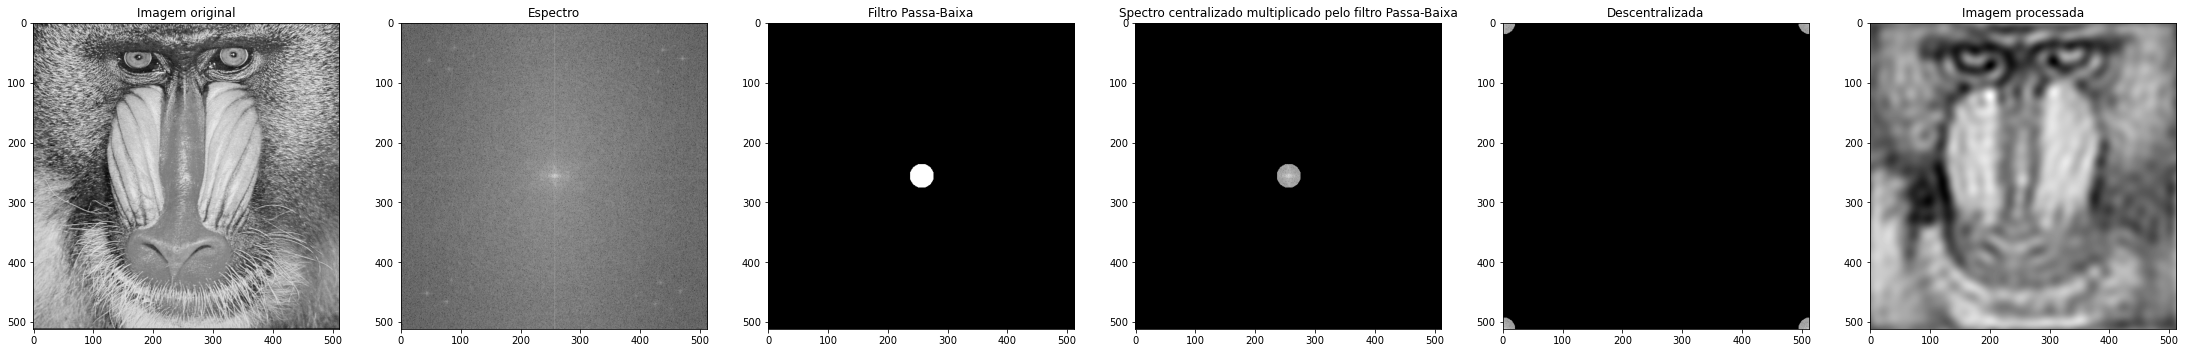

In [3]:
imagem = cv2.imread("baboon.png", 0)

original = np.fft.fft2(imagem)
centralizada = np.fft.fftshift(original)

plt.figure(figsize=(6.4*6, 4.8*6), constrained_layout=False)

plt.subplot(161), plt.imshow(imagem, "gray"), plt.title("Imagem original")

plt.subplot(162), plt.imshow(np.log(1+np.abs(centralizada)), "gray"), plt.title("Espectro")

PassaBaixa = filtroPassaBaixa(20,imagem.shape)
plt.subplot(163), plt.imshow(np.abs(PassaBaixa), "gray"), plt.title("Filtro Passa-Baixa")

PassaBaixaCentralizada = centralizada * filtroPassaBaixa(20,imagem.shape)
plt.subplot(164), plt.imshow(np.log(1+np.abs(PassaBaixaCentralizada)), "gray"), plt.title("Spectro centralizado multiplicado pelo filtro Passa-Baixa")

PassaBaixa = np.fft.ifftshift(PassaBaixaCentralizada)
plt.subplot(165), plt.imshow(np.log(1+np.abs(PassaBaixa)), "gray"), plt.title("Descentralizada")

PassaBaixaInversa = np.fft.ifft2(PassaBaixa)
plt.subplot(166), plt.imshow(np.abs(PassaBaixaInversa), "gray"), plt.title("Imagem processada")

plt.show()

### Passa-Baixa com corte em 50

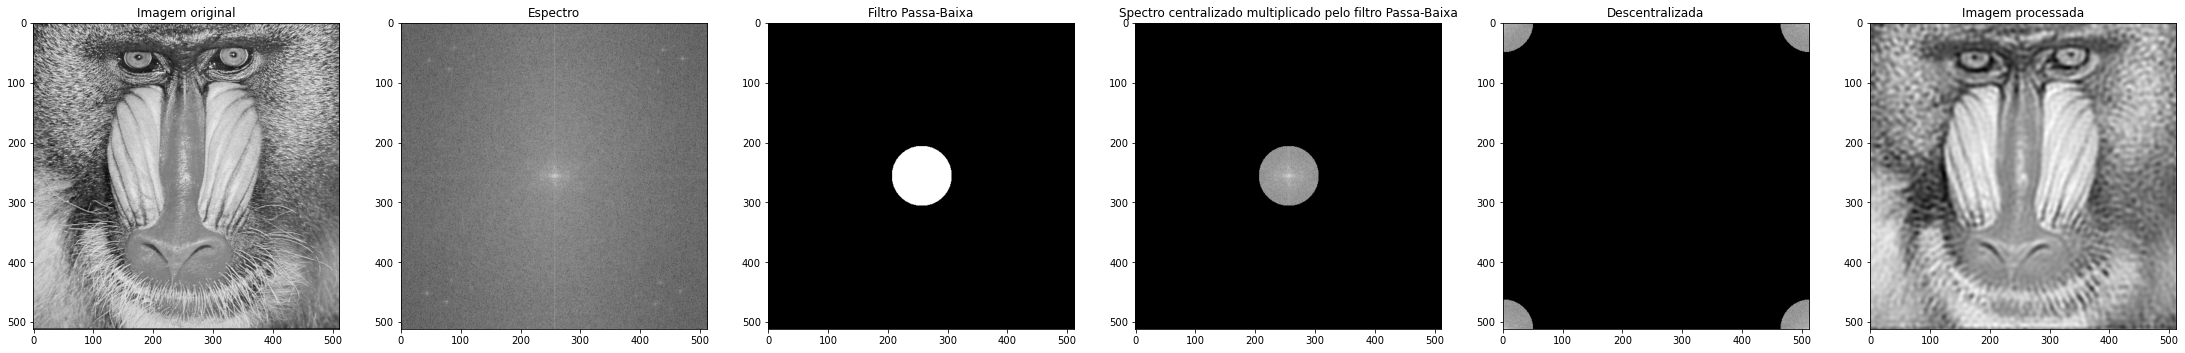

In [4]:
imagem = cv2.imread("baboon.png", 0)

original = np.fft.fft2(imagem)
centralizada = np.fft.fftshift(original)

plt.figure(figsize=(6.4*6, 4.8*6), constrained_layout=False)

plt.subplot(161), plt.imshow(imagem, "gray"), plt.title("Imagem original")

plt.subplot(162), plt.imshow(np.log(1+np.abs(centralizada)), "gray"), plt.title("Espectro")

PassaBaixa = filtroPassaBaixa(50,imagem.shape)
plt.subplot(163), plt.imshow(np.abs(PassaBaixa), "gray"), plt.title("Filtro Passa-Baixa")

PassaBaixaCentralizada = centralizada * filtroPassaBaixa(50,imagem.shape)
plt.subplot(164), plt.imshow(np.log(1+np.abs(PassaBaixaCentralizada)), "gray"), plt.title("Spectro centralizado multiplicado pelo filtro Passa-Baixa")

PassaBaixa = np.fft.ifftshift(PassaBaixaCentralizada)
plt.subplot(165), plt.imshow(np.log(1+np.abs(PassaBaixa)), "gray"), plt.title("Descentralizada")

PassaBaixaInversa = np.fft.ifft2(PassaBaixa)
plt.subplot(166), plt.imshow(np.abs(PassaBaixaInversa), "gray"), plt.title("Imagem processada")

plt.show()

### Passa-Baixa com corte em 80

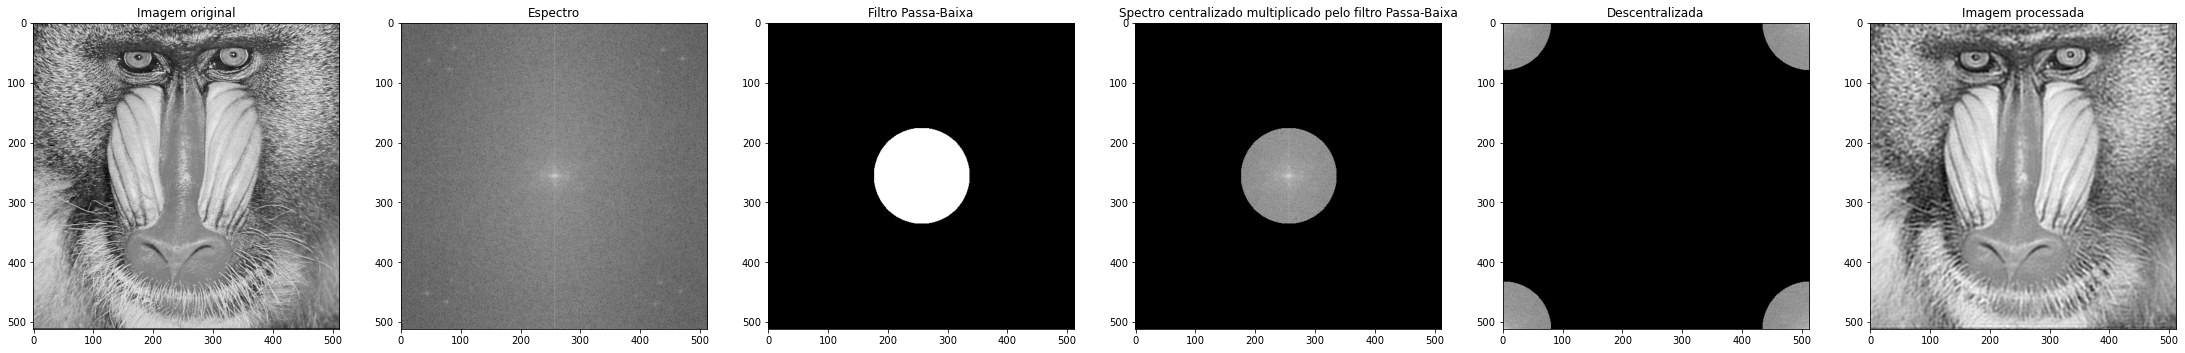

In [5]:
imagem = cv2.imread("baboon.png", 0)

original = np.fft.fft2(imagem)
centralizada = np.fft.fftshift(original)

plt.figure(figsize=(6.4*6, 4.8*6), constrained_layout=False)

plt.subplot(161), plt.imshow(imagem, "gray"), plt.title("Imagem original")

plt.subplot(162), plt.imshow(np.log(1+np.abs(centralizada)), "gray"), plt.title("Espectro")

PassaBaixa = filtroPassaBaixa(80,imagem.shape)
plt.subplot(163), plt.imshow(np.abs(PassaBaixa), "gray"), plt.title("Filtro Passa-Baixa")

PassaBaixaCentralizada = centralizada * filtroPassaBaixa(80,imagem.shape)
plt.subplot(164), plt.imshow(np.log(1+np.abs(PassaBaixaCentralizada)), "gray"), plt.title("Spectro centralizado multiplicado pelo filtro Passa-Baixa")

PassaBaixa = np.fft.ifftshift(PassaBaixaCentralizada)
plt.subplot(165), plt.imshow(np.log(1+np.abs(PassaBaixa)), "gray"), plt.title("Descentralizada")

PassaBaixaInversa = np.fft.ifft2(PassaBaixa)
plt.subplot(166), plt.imshow(np.abs(PassaBaixaInversa), "gray"), plt.title("Imagem processada")

plt.show()

# Passa-Alta

### Passa-Alta com corte em 20

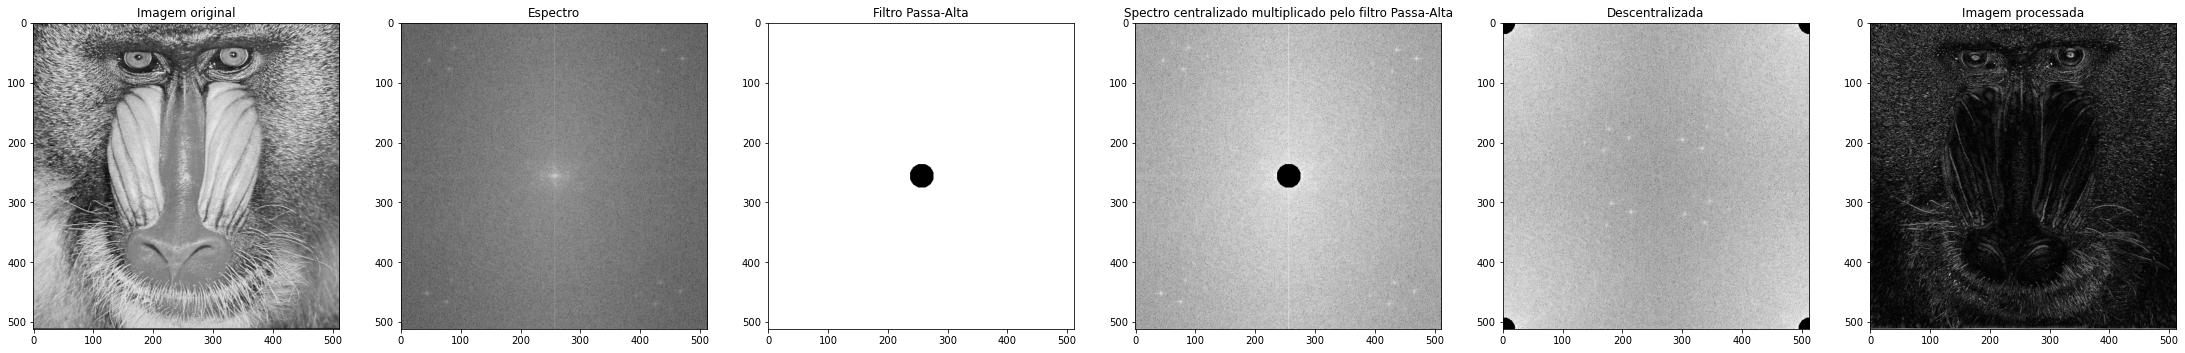

In [6]:
imagem = cv2.imread("baboon.png", 0)

original = np.fft.fft2(imagem)
centralizada = np.fft.fftshift(original)

plt.figure(figsize=(6.4*6, 4.8*6), constrained_layout=False)

plt.subplot(161), plt.imshow(imagem, "gray"), plt.title("Imagem original")

plt.subplot(162), plt.imshow(np.log(1+np.abs(centralizada)), "gray"), plt.title("Espectro")

PassaAlta = filtroPassaAlta(20,imagem.shape)
plt.subplot(163), plt.imshow(np.abs(PassaAlta), "gray"), plt.title("Filtro Passa-Alta")

PassaAltaCentralizada = centralizada * filtroPassaAlta(20,imagem.shape)
plt.subplot(164), plt.imshow(np.log(1+np.abs(PassaAltaCentralizada)), "gray"), plt.title("Spectro centralizado multiplicado pelo filtro Passa-Alta")

PassaAlta = np.fft.ifftshift(PassaAltaCentralizada)
plt.subplot(165), plt.imshow(np.log(1+np.abs(PassaAlta)), "gray"), plt.title("Descentralizada")

PassaAltaInversa = np.fft.ifft2(PassaAlta)
plt.subplot(166), plt.imshow(np.abs(PassaAltaInversa), "gray"), plt.title("Imagem processada")

plt.show()

### Passa-Alta com corte em 50

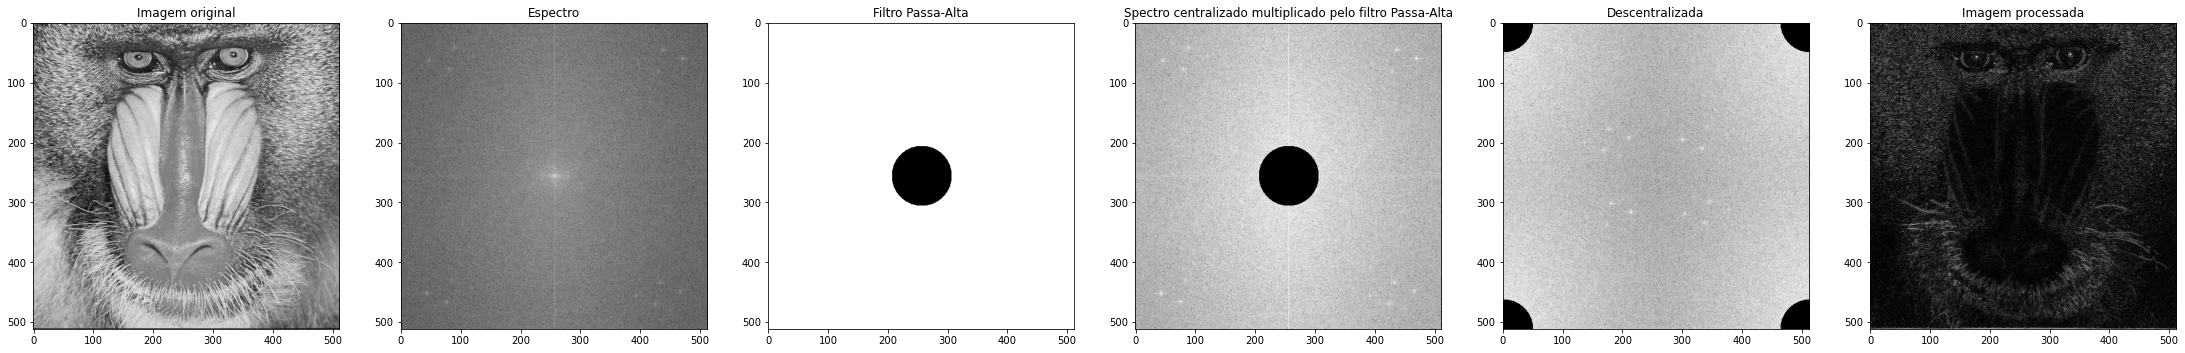

In [7]:
imagem = cv2.imread("baboon.png", 0)

original = np.fft.fft2(imagem)
centralizada = np.fft.fftshift(original)

plt.figure(figsize=(6.4*6, 4.8*6), constrained_layout=False)

plt.subplot(161), plt.imshow(imagem, "gray"), plt.title("Imagem original")

plt.subplot(162), plt.imshow(np.log(1+np.abs(centralizada)), "gray"), plt.title("Espectro")

PassaAlta = filtroPassaAlta(50,imagem.shape)
plt.subplot(163), plt.imshow(np.abs(PassaAlta), "gray"), plt.title("Filtro Passa-Alta")

PassaAltaCentralizada = centralizada * filtroPassaAlta(50,imagem.shape)
plt.subplot(164), plt.imshow(np.log(1+np.abs(PassaAltaCentralizada)), "gray"), plt.title("Spectro centralizado multiplicado pelo filtro Passa-Alta")

PassaAlta = np.fft.ifftshift(PassaAltaCentralizada)
plt.subplot(165), plt.imshow(np.log(1+np.abs(PassaAlta)), "gray"), plt.title("Descentralizada")

PassaAltaInversa = np.fft.ifft2(PassaAlta)
plt.subplot(166), plt.imshow(np.abs(PassaAltaInversa), "gray"), plt.title("Imagem processada")

plt.show()

### Passa-Alta com corte em 80

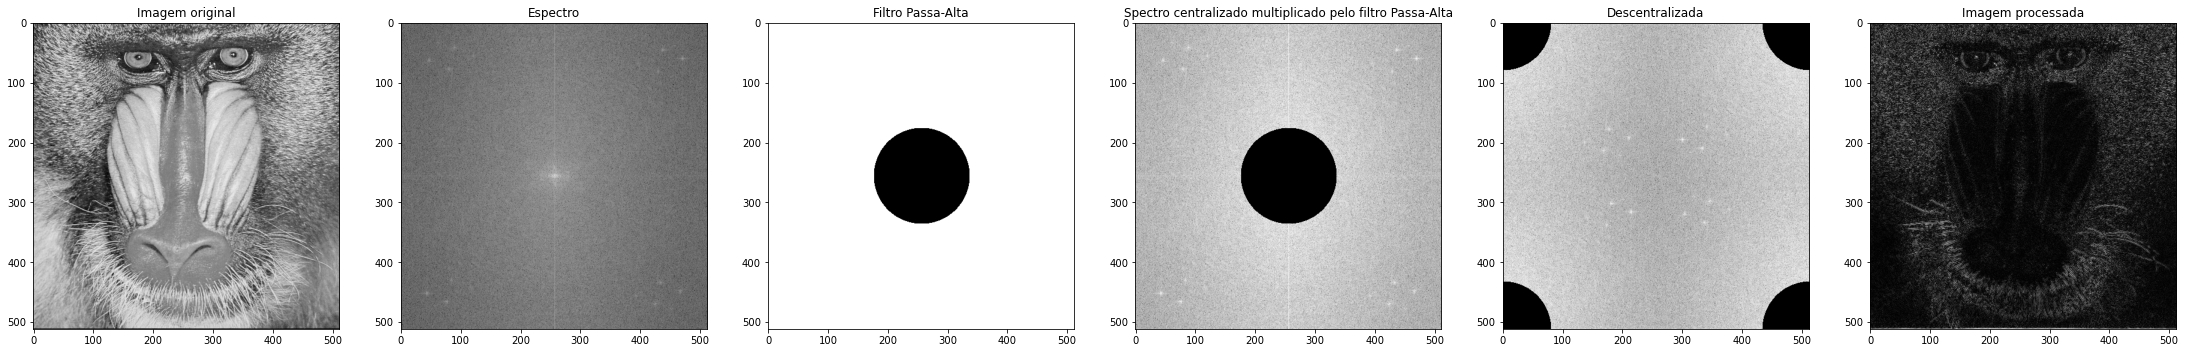

In [8]:
imagem = cv2.imread("baboon.png", 0)

original = np.fft.fft2(imagem)
centralizada = np.fft.fftshift(original)

plt.figure(figsize=(6.4*6, 4.8*6), constrained_layout=False)

plt.subplot(161), plt.imshow(imagem, "gray"), plt.title("Imagem original")

plt.subplot(162), plt.imshow(np.log(1+np.abs(centralizada)), "gray"), plt.title("Espectro")

PassaAlta = filtroPassaAlta(80,imagem.shape)
plt.subplot(163), plt.imshow(np.abs(PassaAlta), "gray"), plt.title("Filtro Passa-Alta")

PassaAltaCentralizada = centralizada * filtroPassaAlta(80,imagem.shape)
plt.subplot(164), plt.imshow(np.log(1+np.abs(PassaAltaCentralizada)), "gray"), plt.title("Spectro centralizado multiplicado pelo filtro Passa-Alta")

PassaAlta = np.fft.ifftshift(PassaAltaCentralizada)
plt.subplot(165), plt.imshow(np.log(1+np.abs(PassaAlta)), "gray"), plt.title("Descentralizada")

PassaAltaInversa = np.fft.ifft2(PassaAlta)
plt.subplot(166), plt.imshow(np.abs(PassaAltaInversa), "gray"), plt.title("Imagem processada")

plt.show()

# Passa-Faixa

### Passa-Faixa com corte em 20

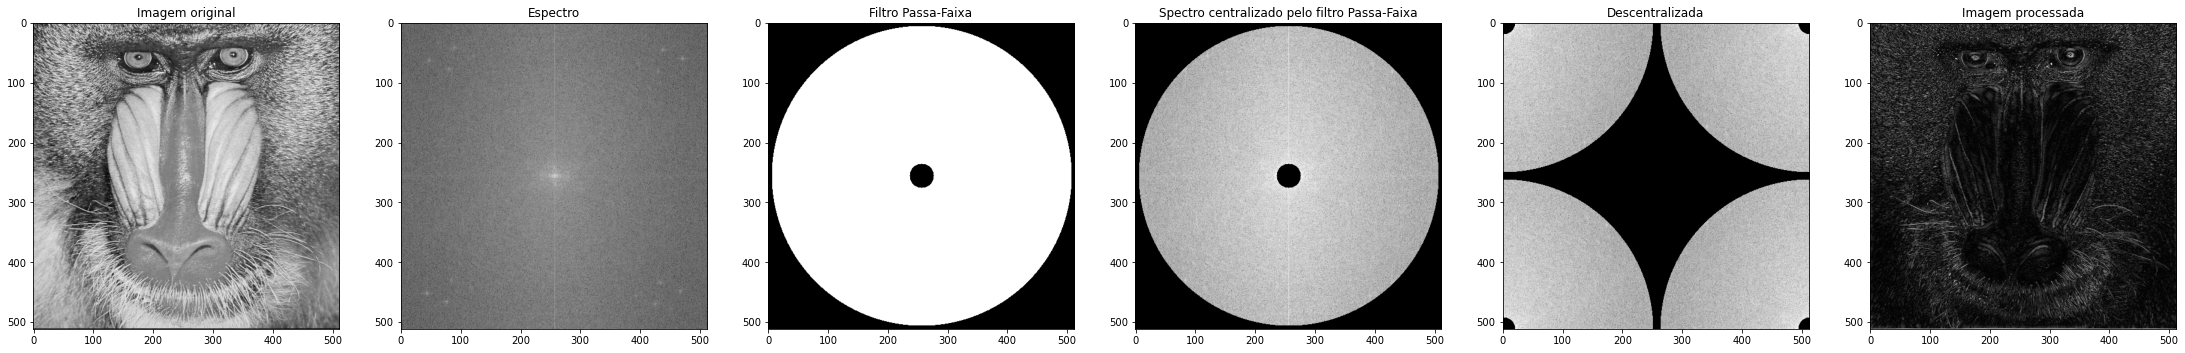

In [9]:
imagem = cv2.imread("baboon.png", 0)

original = np.fft.fft2(imagem)
centralizada = np.fft.fftshift(original)

plt.figure(figsize=(6.4*6, 4.8*6), constrained_layout=False)

plt.subplot(161), plt.imshow(imagem, "gray"), plt.title("Imagem original")

plt.subplot(162), plt.imshow(np.log(1+np.abs(centralizada)), "gray"), plt.title("Espectro")

PassaFaixa = filtroPassaFaixa(20, 250, imagem.shape)
plt.subplot(163), plt.imshow(np.abs(PassaFaixa), "gray"), plt.title("Filtro Passa-Faixa")

PassaFaixaCentralizada = centralizada * filtroPassaFaixa(20, 250, imagem.shape)
plt.subplot(164), plt.imshow(np.log(1+np.abs(PassaFaixaCentralizada)), "gray"), plt.title("Spectro centralizado pelo filtro Passa-Faixa")

PassaFaixa = np.fft.ifftshift(PassaFaixaCentralizada)
plt.subplot(165), plt.imshow(np.log(1+np.abs(PassaFaixa)), "gray"), plt.title("Descentralizada")

PassaFaixaInvertida = np.fft.ifft2(PassaFaixa)
plt.subplot(166), plt.imshow(np.abs(PassaFaixaInvertida), "gray"), plt.title("Imagem processada")

plt.show()

### Passa-Faixa com corte em 50

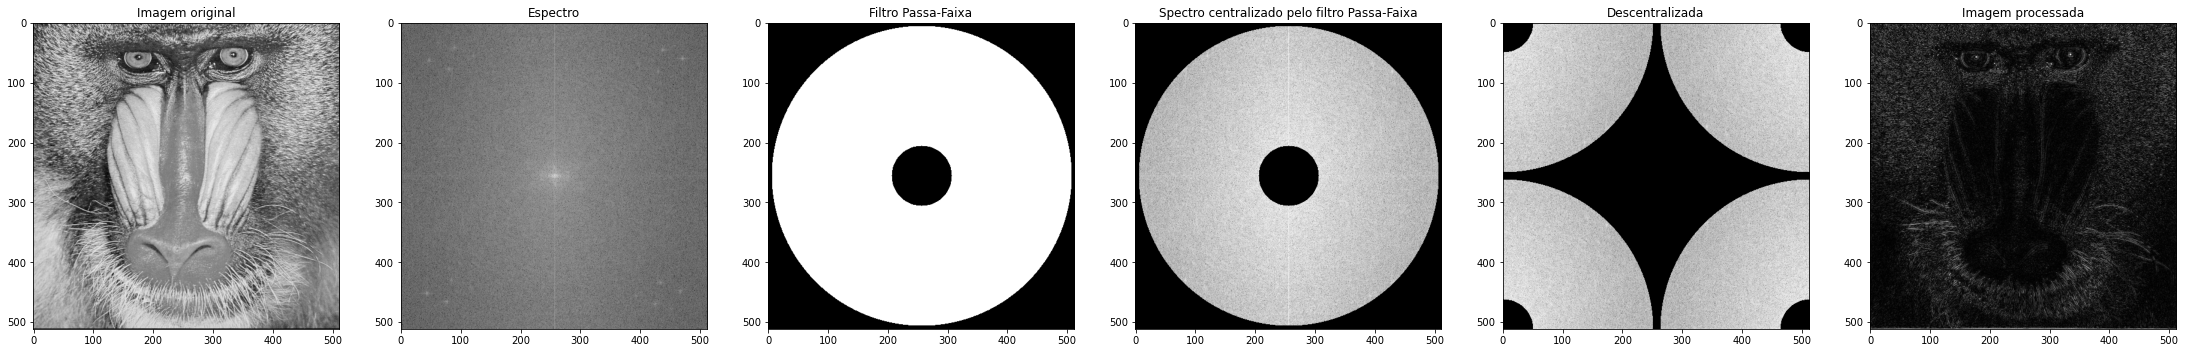

In [10]:
imagem = cv2.imread("baboon.png", 0)

original = np.fft.fft2(imagem)
centralizada = np.fft.fftshift(original)

plt.figure(figsize=(6.4*6, 4.8*6), constrained_layout=False)

plt.subplot(161), plt.imshow(imagem, "gray"), plt.title("Imagem original")

plt.subplot(162), plt.imshow(np.log(1+np.abs(centralizada)), "gray"), plt.title("Espectro")

PassaFaixa = filtroPassaFaixa(50, 250, imagem.shape)
plt.subplot(163), plt.imshow(np.abs(PassaFaixa), "gray"), plt.title("Filtro Passa-Faixa")

PassaFaixaCentralizada = centralizada * filtroPassaFaixa(50, 250, imagem.shape)
plt.subplot(164), plt.imshow(np.log(1+np.abs(PassaFaixaCentralizada)), "gray"), plt.title("Spectro centralizado pelo filtro Passa-Faixa")

PassaFaixa = np.fft.ifftshift(PassaFaixaCentralizada)
plt.subplot(165), plt.imshow(np.log(1+np.abs(PassaFaixa)), "gray"), plt.title("Descentralizada")

PassaFaixaInvertida = np.fft.ifft2(PassaFaixa)
plt.subplot(166), plt.imshow(np.abs(PassaFaixaInvertida), "gray"), plt.title("Imagem processada")

plt.show()

### Passa-Faixa com corte em 80

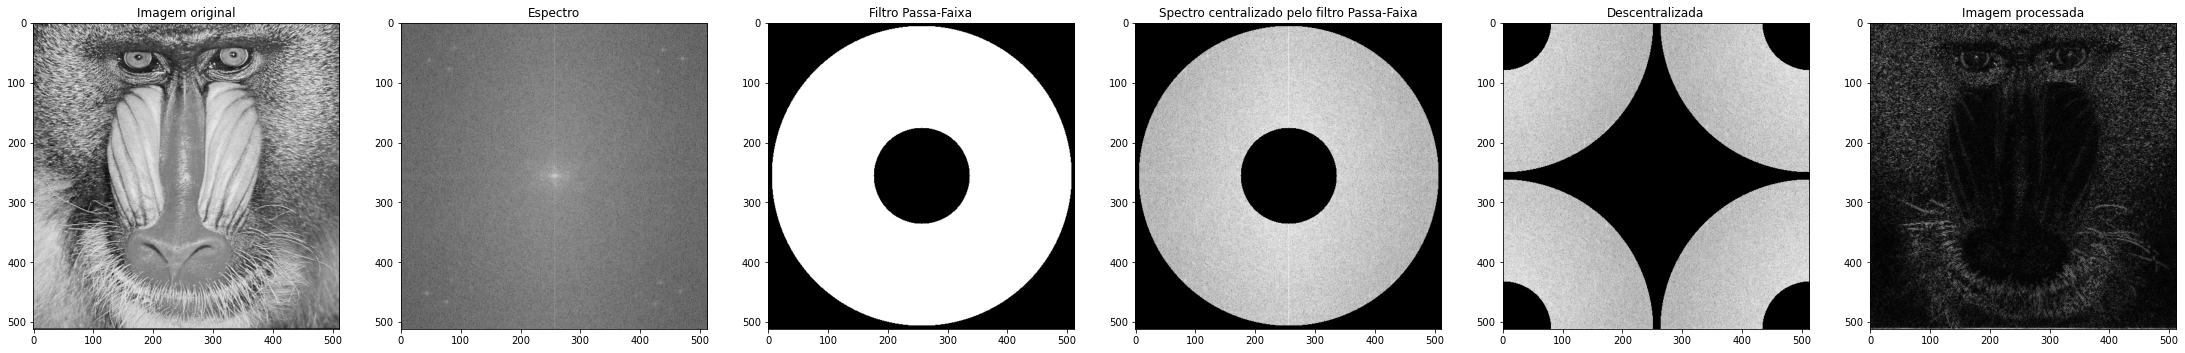

In [11]:
imagem = cv2.imread("baboon.png", 0)

original = np.fft.fft2(imagem)
centralizada = np.fft.fftshift(original)

plt.figure(figsize=(6.4*6, 4.8*6), constrained_layout=False)

plt.subplot(161), plt.imshow(imagem, "gray"), plt.title("Imagem original")

plt.subplot(162), plt.imshow(np.log(1+np.abs(centralizada)), "gray"), plt.title("Espectro")

PassaFaixa = filtroPassaFaixa(80, 250, imagem.shape)
plt.subplot(163), plt.imshow(np.abs(PassaFaixa), "gray"), plt.title("Filtro Passa-Faixa")

PassaFaixaCentralizada = centralizada * filtroPassaFaixa(80, 250, imagem.shape)
plt.subplot(164), plt.imshow(np.log(1+np.abs(PassaFaixaCentralizada)), "gray"), plt.title("Spectro centralizado pelo filtro Passa-Faixa")

PassaFaixa = np.fft.ifftshift(PassaFaixaCentralizada)
plt.subplot(165), plt.imshow(np.log(1+np.abs(PassaFaixa)), "gray"), plt.title("Descentralizada")

PassaFaixaInvertida = np.fft.ifft2(PassaFaixa)
plt.subplot(166), plt.imshow(np.abs(PassaFaixaInvertida), "gray"), plt.title("Imagem processada")

plt.show()

# Compressão da imagem

### Compressão com limite de 0.002

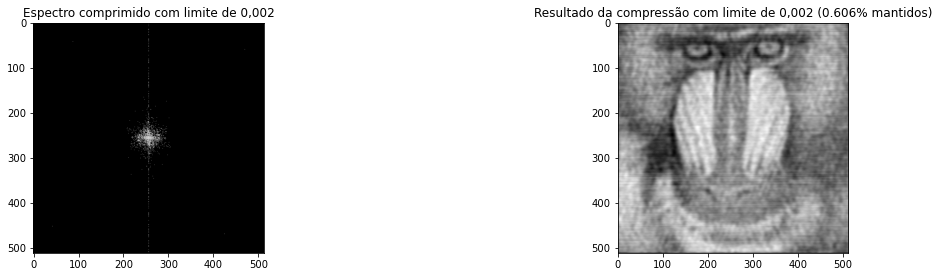

In [12]:
imagem = cv2.imread("baboon.png", 0)

original = np.fft.fft2(imagem)
centralizada = np.fft.fftshift(original)

recuperaLimite = lambda limite: np.max(np.abs(centralizada))*limite

limite = recuperaLimite(0.002)
espectroComprimido, porcentagem = comprimirLimite(centralizada, limite)

i = np.fft.ifft2(espectroComprimido)

plt.figure(figsize=(6.4*3, 4.8*3), constrained_layout=False)

plt.subplot(321), plt.imshow(np.log(1+np.abs(espectroComprimido)), "gray"), plt.title("Espectro comprimido com limite de 0,002")
plt.subplot(322), plt.imshow(np.abs(i), "gray"), plt.title("Resultado da compressão com limite de 0,002 ({:.3f}% mantidos)".format(porcentagem))


plt.show()

### Compressão com limite de 0.5

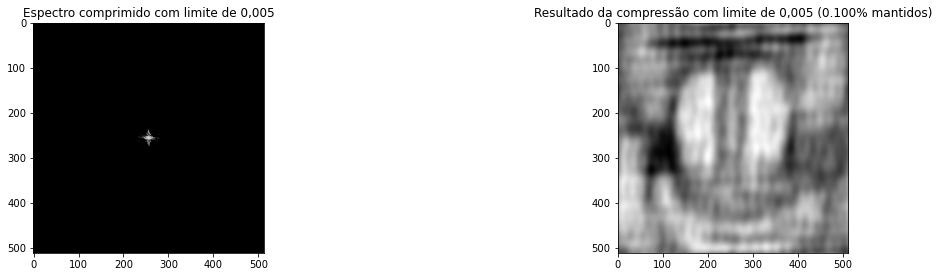

In [13]:
imagem = cv2.imread("baboon.png", 0)

original = np.fft.fft2(imagem)
centralizada = np.fft.fftshift(original)

recuperaLimite = lambda limite: np.max(np.abs(centralizada))*limite

limite = recuperaLimite(0.005)
espectroComprimido, porcentagem = comprimirLimite(centralizada, limite)

i = np.fft.ifft2(espectroComprimido)

plt.figure(figsize=(6.4*3, 4.8*3), constrained_layout=False)

plt.subplot(321), plt.imshow(np.log(1+np.abs(espectroComprimido)), "gray"), plt.title("Espectro comprimido com limite de 0,005")
plt.subplot(322), plt.imshow(np.abs(i), "gray"), plt.title("Resultado da compressão com limite de 0,005 ({:.3f}% mantidos)".format(porcentagem))


plt.show()

### Compressão com limite de 0.5

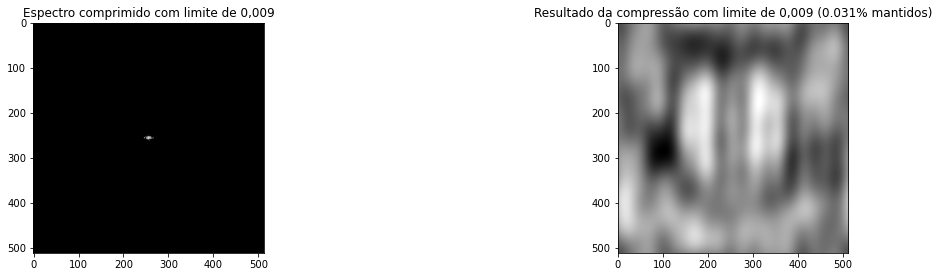

In [14]:
imagem = cv2.imread("baboon.png", 0)

original = np.fft.fft2(imagem)
centralizada = np.fft.fftshift(original)

recuperaLimite = lambda limite: np.max(np.abs(centralizada))*limite

limite = recuperaLimite(0.009)
espectroComprimido, porcentagem = comprimirLimite(centralizada, limite)

i = np.fft.ifft2(espectroComprimido)

plt.figure(figsize=(6.4*3, 4.8*3), constrained_layout=False)

plt.subplot(321), plt.imshow(np.log(1+np.abs(espectroComprimido)), "gray"), plt.title("Espectro comprimido com limite de 0,009")
plt.subplot(322), plt.imshow(np.abs(i), "gray"), plt.title("Resultado da compressão com limite de 0,009 ({:.3f}% mantidos)".format(porcentagem))


plt.show()

# Espectro com imagem rotacionada em 45 graus

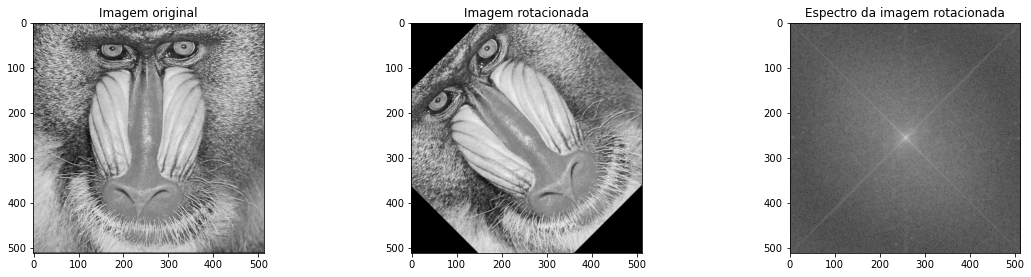

In [15]:
imagem = cv2.imread("baboon.png", 0)

(altura, largura) = imagem.shape[:2]
(cX, cY) = (largura // 2, altura // 2)

matrizRotacionada = cv2.getRotationMatrix2D((cX, cY), 45, 1.0)
rotacionada = cv2.warpAffine(imagem, matrizRotacionada, (largura, altura))

original = np.fft.fft2(rotacionada)
centralizada = np.fft.fftshift(original)

plt.figure(figsize=(6.4*3, 4.8*3), constrained_layout=False)

plt.subplot(331), plt.imshow(imagem, "gray"), plt.title("Imagem original")

plt.subplot(332), plt.imshow(rotacionada, "gray"), plt.title("Imagem rotacionada")

plt.subplot(333), plt.imshow(np.log(1+np.abs(centralizada)), "gray"), plt.title("Espectro da imagem rotacionada")

plt.show()